# De las Series a la Transformada de Fourier

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Intuición

Vimos anteriormente que una señal periódica arbitraria, que cumpla con las [condiciones de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_conditions), es siempre posible de descomponer en una [Serie de Fourier](./12-Series_de_Fourier.ipynb). 

### ¿Qué pasa con una función que no es periódica?

Hay varias formas intuitivas de entender este caso.

- Lo primero que puede pensarse es que una señal no periódica, igual puede escribirse como una Serie de Fourier en un intervalo acotado, donde cumpla las condiciones de Dirichlet. Lo que suceda fuera del intervalo de interés, no es relevante y puede considerarse que la serie es periódica fuera de él. Esto se conoce como periodizar una función.

- Lo segundo es pensar una señal no periódica es en realidad una función periódica, pero de período infinito. En este caso, tenemos lo siguiente

$$ x(t) = \sum_{n=-\infty}^{\infty} c_n e^{i 2 \pi n/T} $$



<div class="alert alert-block alert-info">
<font color="red">Podemos concluir que, para una función no periódica, la energía de la señal no se concentra en algunas frecuencias del espectro, si no que se distribuye en todas las frecuencias. Esto implica que las frecuencias involucradas ya no se indexan mediante una variable discreta, si no por una variable continua. El espectro se convierte en una función contínua en la frecuencia.</font>
</div>

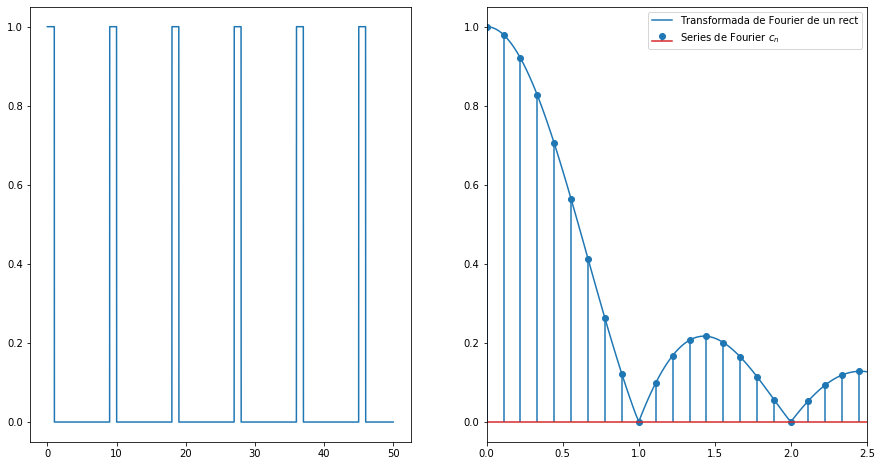

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fourierSeries_cn(period, N):
    """Cálculo de los coeficientes complejos cn up hasta el N-ésimo armónico"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        c_plusn = 1/T * (period * np.exp(-2j*np.pi*n*t/T)).sum()
        c_minusn = 1/T * (period * np.exp(2j*np.pi*n*t/T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)

P=9

Fs = 1000
t = np.arange(0, 50, 1/Fs)
t_period = np.arange(0, P, 1/Fs)
x_p = lambda t: (abs((t % P)-0.5) <= 0.5).astype(float)
x = lambda t: (abs(t-0.5) <= 0.5).astype(float)


plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(t, x_p(t))
    
cn = fourierSeries_cn(x_p(t_period), 100)[:,0]
f_discrete = np.arange(len(cn))/P
    
f = np.linspace(0, Fs, len(t), endpoint=False)
X = np.fft.fft(x(t))/Fs
plt.subplot(122)
plt.plot(f, abs(X), label='Transformada de Fourier de un rect')
plt.stem(f_discrete, abs(cn*P), label='Series de Fourier $c_n$',use_line_collection=True)
plt.xlim(0, 2.5)
plt.legend()

plt.show()

<a name="relacion_series_transformada"></a>
***
## Relación entre las Series de Fourier y la Transformada de Fourier
Toda distribución períodica de período $T$ $\mathbf{U} \in \mathcal{S}'(\mathbb{R};\mathbb{C})$ puede escribirse como una Serie de Fourier:

$$ \mathbf{U} = \sum_{n \in \mathbb{Z}}c_n(\mathbf{U})e^{i 2 \pi n t/T} \mathbf{1}  $$

Adicionalmente, $\mathbf{U}$ tiene una Transformada de Fourier bien definida:


$$ \mathcal{F}\{\mathbf{U}\} = \sum_{n \in \mathbb{Z}}c_n(\mathbf{U}) \mathcal{F}\{e^{i 2 \pi n t/T} \mathbf{1}\}  =\sum_{n \in \mathbb{Z}}c_n(\mathbf{U}) \mathbf{\delta_{2 \pi n/T}} $$

tal que la Transformada de Fourier $\mathcal{F}\{\mathbf{U}\}$ es una serie de impulsos de Dirac centrados en $2 \pi n t/T$, $n \in \mathbb{Z}$, cada uno escalado por los coeficientes de Fourier $c_n(\mathbf{U})$. 

<font color="red"><b>Vemos que la Serie de Fourier y la Transformada de Fourier están intrínsecamente relacionadas en el sentido de las distribuciones.</b></font>

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>